In [130]:
import pandas as pd

In [131]:
df= pd.read_csv("../CRIS_data/train_demand/demand_12138.csv")
df.head()

,'booking_date','journey_date','trnno','brdpt_code','resupto_code','cls','PSGN'
0,2023-04-03,2023-08-01,'12138','MRA ','CSMT','SL ',12
1,2023-04-08,2023-08-01,'12138','BPL ','DR ','3A ',2
2,2023-04-18,2023-08-01,'12138','NDLS','MTJ ','SL ',4
3,2023-04-24,2023-08-01,'12138','VGLJ','CSMT','2A ',3
4,2023-05-08,2023-08-01,'12138','DHO ','CSMT','3A ',6


In [132]:
df.shape

(736039, 7)

In [133]:
df.columns = df.columns.str.strip().str.strip("'")
cols_to_clean = ['brdpt_code', 'resupto_code', 'cls', 'trnno']
for col in cols_to_clean:
    df[col] = df[col].str.strip().str.strip("'")
    df[col] = df[col].str.strip()

df.head()

,booking_date,journey_date,trnno,brdpt_code,resupto_code,cls,PSGN
0,2023-04-03,2023-08-01,12138,MRA,CSMT,SL,12
1,2023-04-08,2023-08-01,12138,BPL,DR,3A,2
2,2023-04-18,2023-08-01,12138,NDLS,MTJ,SL,4
3,2023-04-24,2023-08-01,12138,VGLJ,CSMT,2A,3
4,2023-05-08,2023-08-01,12138,DHO,CSMT,3A,6


In [134]:
(df["brdpt_code"].unique())

array(['MRA', 'BPL', 'NDLS', 'VGLJ', 'DHO', 'BTI', 'FZR', 'AGC', 'HD',
       'RKMP', 'GWL', 'NDPM', 'ET', 'KNW', 'MTJ', 'KKP', 'ROK', 'BSL',
       'GJUT', 'BAU', 'FDK', 'BHS', 'LAR', 'BAQ', 'KKN', 'BINA', 'BPF',
       'RKM', 'JL', 'MSZ', 'BLZ', 'BRZ', 'GNA', 'DAA', 'CSN', 'SSB',
       'DBA', 'BGZ', 'JHL', 'JIND', 'MAUR', 'NRW', 'FDB', 'NK', 'BAB',
       'KSV', 'TUN', 'DKZ', 'MMR', 'KYN', 'DR'], dtype=object)

In [135]:
df["resupto_code"].unique()

array(['CSMT', 'DR', 'MTJ', 'NDLS', 'KYN', 'MMR', 'VGLJ', 'BPL', 'BSL',
       'AGC', 'KKN', 'DHO', 'BPF', 'RKMP', 'NK', 'KSV', 'BAB', 'GWL',
       'BAU', 'FDB', 'BHS', 'HD', 'SSB', 'BINA', 'KNW', 'ROK', 'BGZ',
       'CSN', 'ET', 'DKZ', 'LAR', 'DAA', 'DBA', 'JL', 'BAQ', 'MRA',
       'NDPM', 'RKM', 'NRW', 'JHL', 'BTI', 'JIND', 'MSZ', 'BLZ', 'FDK',
       'KKP', 'TUN', 'GJUT', 'BRZ', 'MAUR', 'GNA'], dtype=object)

In [136]:
print(df["journey_date"].value_counts())
print(df['journey_date'].dtype)


journey_date
2023-11-18    1530
2024-11-02    1495
2024-11-03    1410
2024-08-17    1410
2023-09-02    1392
              ... 
2025-06-23     783
2025-06-25     778
2025-07-01     766
2024-09-05     694
2024-10-31     657
Name: count, Length: 730, dtype: int64
object


In [137]:
df['journey_date']=pd.to_datetime(df['journey_date'])
df['booking_date']=pd.to_datetime(df['booking_date'])
df.to_pickle("dfT22222.pkl")




In [138]:
df["PSGN"].describe()


count    736039.000000
mean          2.547173
std           3.160142
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max         185.000000
Name: PSGN, dtype: float64

In [139]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates # Add this line


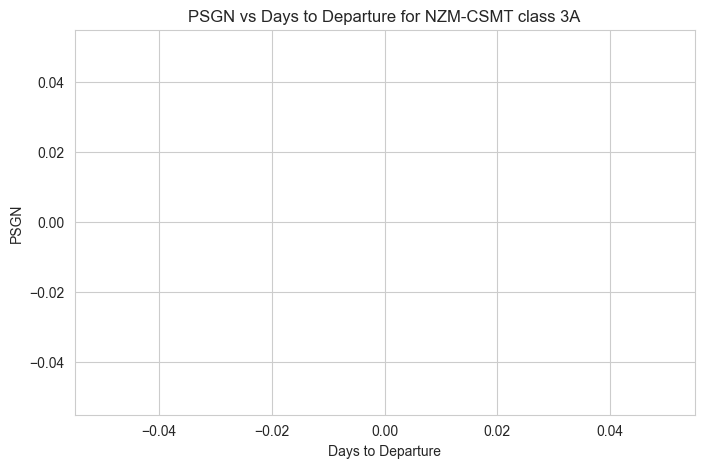

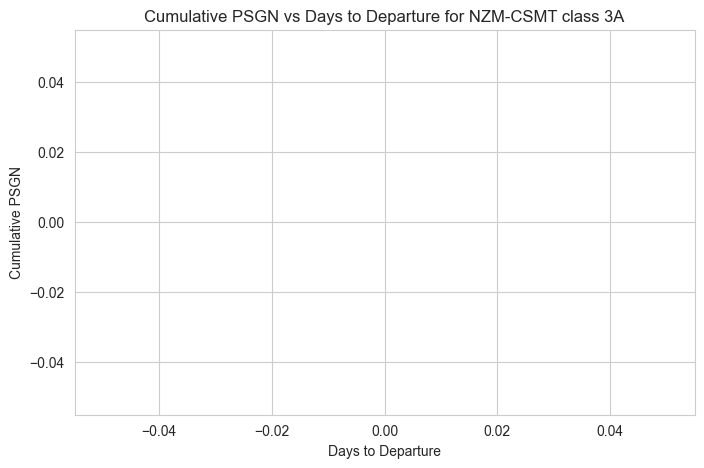

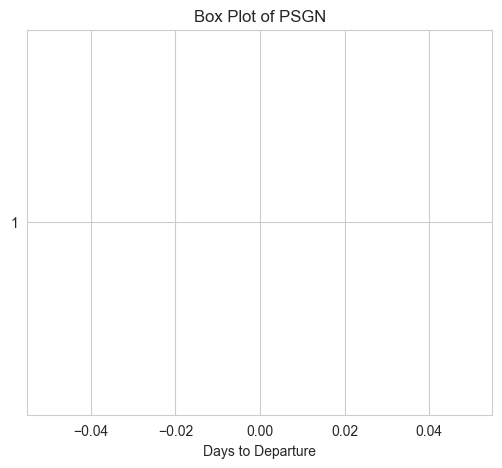

In [140]:


# 1. --- Define and filter for the specific journey ---
# Change these values to analyze the journey you are interested in.
brdpt_code_filter = 'NZM'
resupto_code_filter = 'CSMT'
cls_filter = '3A'

# Apply the filters
journey_df = df[
    
    (df['brdpt_code'] == brdpt_code_filter) &
    (df['resupto_code'] == resupto_code_filter) &
    (df['cls'] == cls_filter)
].copy()


# 2. --- Prepare the data for plotting ---
# Sort the data by booking date to ensure the cumulative sum is correct
# journey_df = journey_df.sort_values(by='booking_date')
# journey_df=journey_df.groupby('booking_date')['PSGN'].sum().reset_index()
journey_df['journey_date']=pd.to_datetime(journey_df['journey_date'])
journey_df['booking_date']=pd.to_datetime(journey_df['booking_date'])

journey_df['days_to_departure']=(journey_df['journey_date']-journey_df['booking_date']).dt.days
df11=journey_df.copy()
journey_df=journey_df.groupby('days_to_departure')['PSGN'].mean().reset_index()
journey_df = journey_df.sort_values(by='days_to_departure', ascending=False)
journey_df['cumulative_psgn'] = journey_df['PSGN'].cumsum()

import matplotlib.pyplot as plt

# Plot 1: PSGN vs days_to_departure
plt.figure(figsize=(8,5))
plt.plot(journey_df['days_to_departure'], journey_df['PSGN'], marker='o')
plt.xlabel('Days to Departure')
plt.ylabel('PSGN')
plt.title(f'PSGN vs Days to Departure for {brdpt_code_filter}-{resupto_code_filter} class {cls_filter}')
plt.grid(True)
plt.show()

# Plot 2: cumulative_psgn vs days_to_departure
plt.figure(figsize=(8,5))
plt.plot(journey_df['days_to_departure'], journey_df['cumulative_psgn'], marker='o', color='orange')
plt.xlabel('Days to Departure')
plt.ylabel('Cumulative PSGN')
plt.title(f'Cumulative PSGN vs Days to Departure for {brdpt_code_filter}-{resupto_code_filter} class {cls_filter}')
plt.grid(True)
plt.show()

# Plot 3: Distribution of PSGN
plt.figure(figsize=(6,5))
plt.boxplot(journey_df['PSGN'], vert=False)
plt.xlabel('Days to Departure')
plt.title('Box Plot of PSGN')
plt.grid(True)
plt.show()


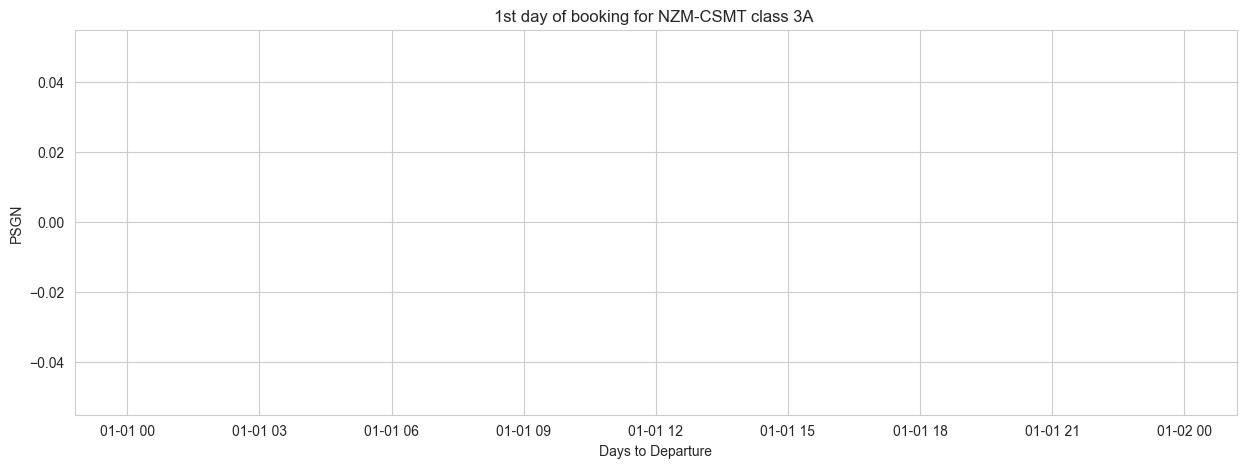

In [141]:
df11= df11.groupby('journey_date')['days_to_departure'].max().reset_index()
import matplotlib.pyplot as plt

# Plot 1: PSGN vs days_to_departure
plt.figure(figsize=(15,5))
plt.plot(df11['journey_date'], df11['days_to_departure'], marker='o')
plt.xlabel('Days to Departure')
plt.ylabel('PSGN')
plt.title(f'1st day of booking for {brdpt_code_filter}-{resupto_code_filter} class {cls_filter} ')
plt.grid(True)
plt.show()


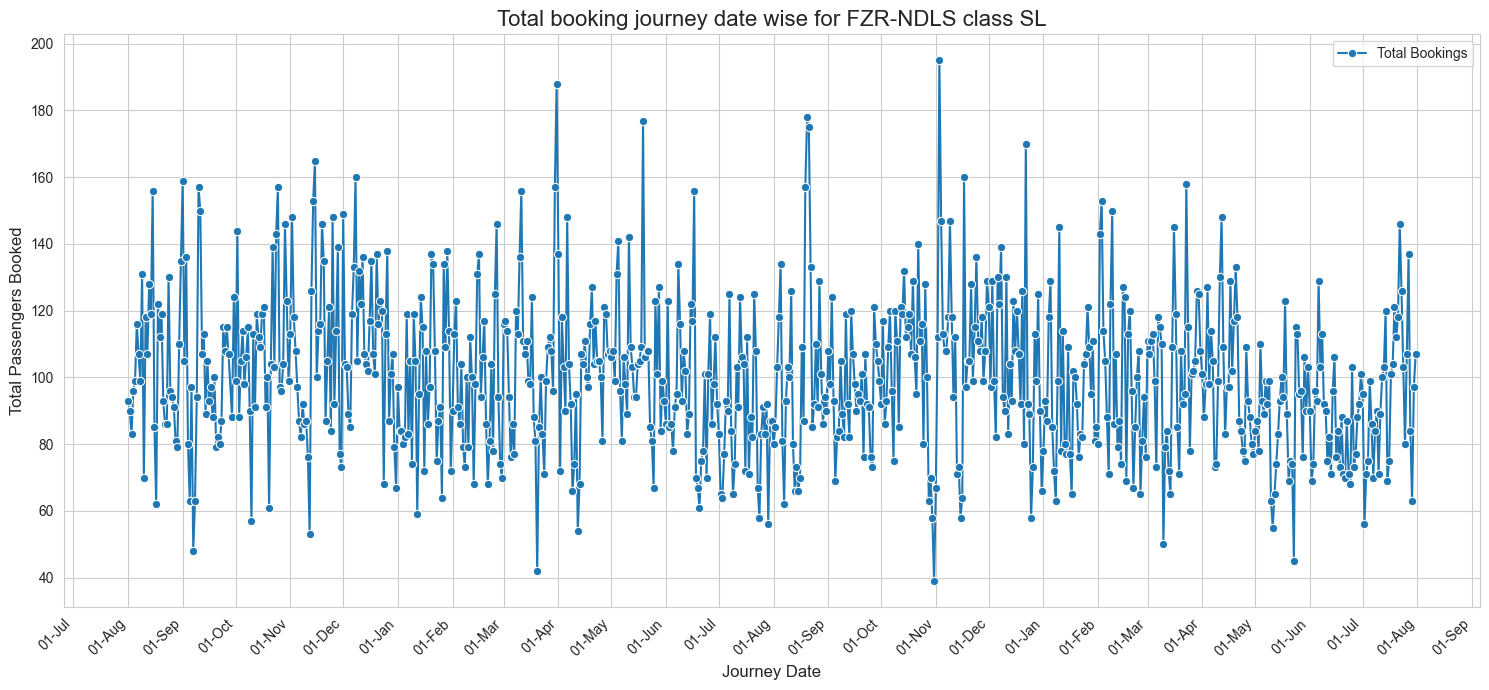

In [142]:


# Assume 'df' is your initial DataFrame
# Ensure date columns are in datetime format
df['booking_date'] = pd.to_datetime(df['booking_date'])
df['journey_date'] = pd.to_datetime(df['journey_date'])


# --- 1. DATA PREPARATION ---
brdpt_code_filtr = 'FZR'
resupto_code_filtr = 'NDLS'
cls_filtr = 'SL'

# Filter for only class '3A'
df_3A = df[(df['cls'] == cls_filtr)  
           & (df['brdpt_code']==brdpt_code_filtr)
           & (df['resupto_code']==resupto_code_filtr)
           ].copy()

# A. Prepare the data for the FIRST line (total bookings)
daily_journey_df = df_3A.groupby('journey_date')['PSGN'].sum().reset_index()
daily_journey_df.rename(columns={'PSGN': 'total_psgn'}, inplace=True)

# B. Prepare the data for the SECOND line (last-minute bookings)
# Calculate the difference in days between booking and journey
df_3A['days_before_journey'] = (df_3A['journey_date'] - df_3A['booking_date']).dt.days

# Filter for bookings made 0 or 1 day before the journey
last_minute_bookings = df_3A[df_3A['days_before_journey'] <= 1]

# Group by journey date and sum the last-minute passengers
last_minute_summary = last_minute_bookings.groupby('journey_date')['PSGN'].sum().reset_index()
last_minute_summary.rename(columns={'PSGN': 'last_minute_psgn'}, inplace=True)

# C. Merge the two datasets for easy plotting
combined_df = pd.merge(daily_journey_df, last_minute_summary, on='journey_date', how='left').fillna(0)


# --- 2. VISUALIZATION ---

plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")

# Create the line plot for the FIRST line (Total Passengers)
plot = sns.lineplot(
    x='journey_date',
    y='total_psgn',
    data=combined_df,
    marker='o',
    label='Total Bookings' # Add a label for the legend
)

# ADD THE SECOND line plot on the SAME axes (Last-Minute Passengers)
# sns.lineplot(
#     x='journey_date',
#     y='last_minute_psgn',
#     data=combined_df,
#     marker='x',
#     color='red',
#     label='Last-Minute Bookings (<=1 Day)', # Add a label for the legend
#     ax=plot # Tell seaborn to draw on the same plot object
# )

# Set titles and labels
plot.set_title(f'Total booking journey date wise for {brdpt_code_filtr}-{resupto_code_filtr} class {cls_filtr}', fontsize=16)
plot.set_xlabel('Journey Date', fontsize=12)
plot.set_ylabel('Total Passengers Booked', fontsize=12)

# Format the x-axis ticks
plot.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plot.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.xticks(rotation=45, ha='right')
plt.legend() # Display the legend

plt.tight_layout()
plt.show()


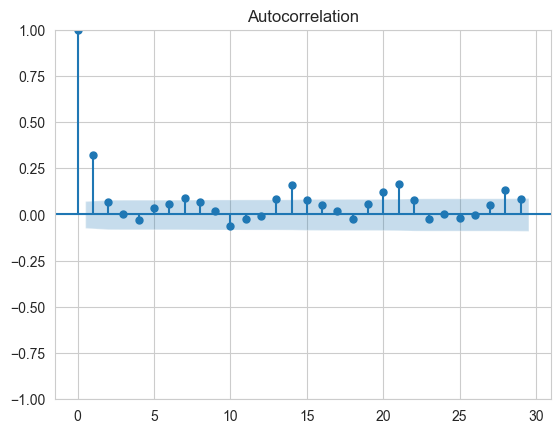

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
# Load time series data
# data = pd.read_csv('GOOG.csv', index_col=0)
plot_acf(daily_journey_df['total_psgn'], alpha=0.05)
plt.show()

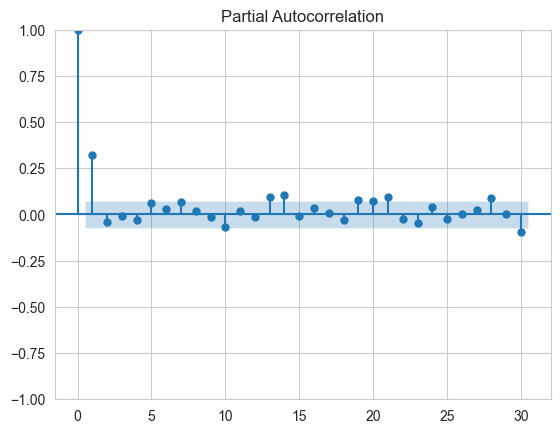

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot
plot_pacf(daily_journey_df['total_psgn'], alpha=0.05, lags=30, method='ywm')
plt.show()


In [145]:
daily_journey_df['day_of_week'] = daily_journey_df['journey_date'].dt.day_name()


# 2. --- Group by the day of the week and calculate the average ---
# This calculates the average 'total_psgn' for each unique day
avg_by_day = daily_journey_df.groupby('day_of_week')['total_psgn'].mean().reset_index()


# 3. --- Sort the results for better readability ---
# By default, the days will be sorted alphabetically (Friday, Monday, etc.)
# Let's sort them in the correct order of the week.
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_day['day_of_week'] = pd.Categorical(avg_by_day['day_of_week'], categories=days_order, ordered=True)
avg_by_day = avg_by_day.sort_values('day_of_week')

# --- Display the final averaged DataFrame ---
print("Average Total Passengers by Day of the Week:")
print(avg_by_day)


# # 4. --- Visualize the averages with a bar chart ---
# plt.figure(figsize=(10, 6))
# sns.set_style("whitegrid")

# plot = sns.barplot(
#     x='day_of_week',
#     y='total_psgn',
#     data=avg_by_day
# )

# plot.set_title('Average Total Passengers by Day of the Week', fontsize=16)
# plot.set_xlabel('Day of the Week', fontsize=12)
# plot.set_ylabel('Average Total Passengers', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

Average Total Passengers by Day of the Week:
  day_of_week  total_psgn
1      Monday  102.163462
5     Tuesday   94.695238
6   Wednesday   95.209524
4    Thursday   92.336538
0      Friday   95.923077
2    Saturday  105.586538
3      Sunday  116.009615


In [146]:
daily_journey_df['month'] = daily_journey_df['journey_date'].dt.month_name()


# 2. --- Group by the month and calculate the average ---
avg_by_month = daily_journey_df.groupby('month')['total_psgn'].mean()


# 3. --- Sort the results for in chronological order ---
# By default, months are sorted alphabetically. We'll sort them correctly.
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
avg_by_month = avg_by_month.reindex(months_order).dropna()

# --- Display the final averaged DataFrame ---
print("Average Total Passengers by Month:")
print(avg_by_month)


Average Total Passengers by Month:
month
January       96.258065
February      98.438596
March        103.596774
April        101.016667
May           96.790323
June          91.583333
July          91.435484
August       102.419355
September     98.474576
October      105.274194
November     109.416667
December     108.225806
Name: total_psgn, dtype: float64


Busiest Routes for Class 3A by Percentage:
            route  total_passengers  percentage
808    FZR - NDLS             88407   12.757548
482    BTI - NDLS             33068    4.771869
360    BPL - CSMT             33013    4.763932
519   CSMT - NDLS             25697    3.708199
782    FDK - NDLS             23077    3.330120
528   CSMT - VGLJ             17348    2.503398
504    CSMT - GWL             16321    2.355197
12     AGC - CSMT             15461    2.231095
146    BAU - CSMT             14370    2.073659
1105    NDLS - NK             12891    1.860232


C:\Users\mailt\AppData\Local\Temp\ipykernel_12460\763557518.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(


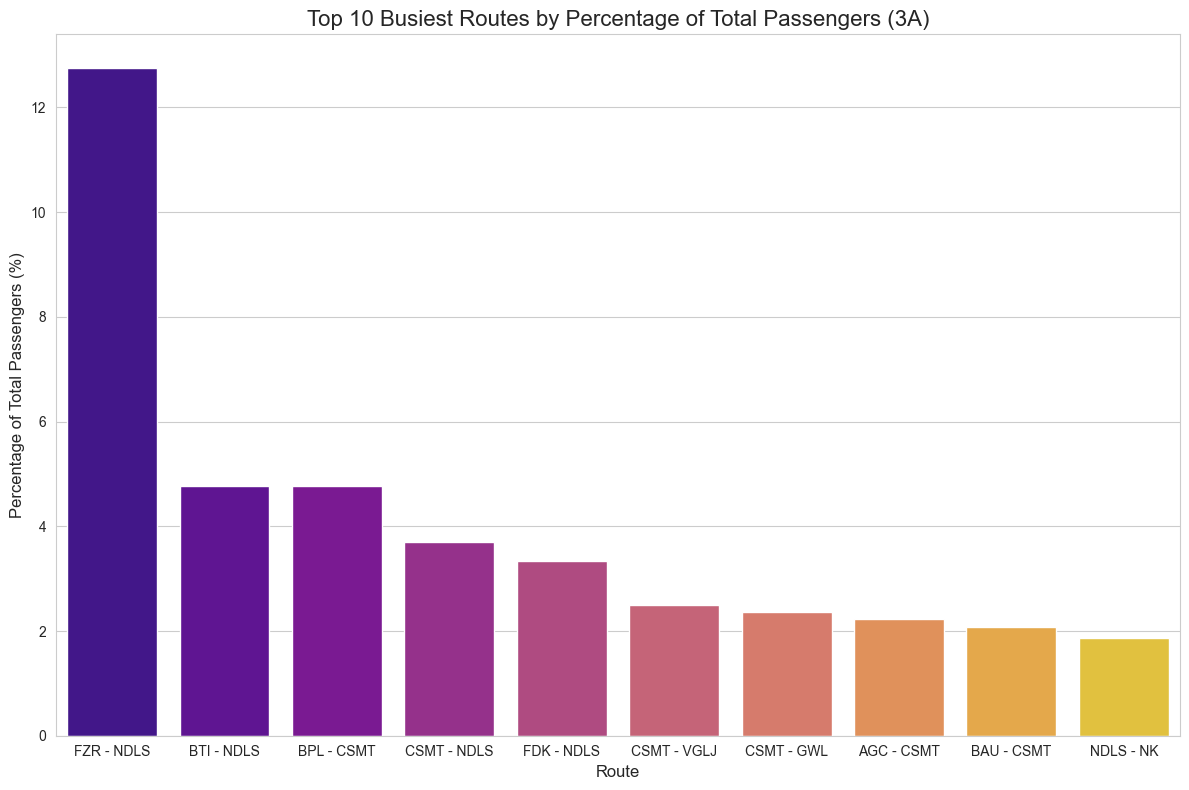

In [147]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. --- Filter and create the canonical 'route' (same as before) ---
df_3A = df[df['cls'] == '3A'].copy()
df_3A['route'] = df_3A.apply(
    lambda row: ' - '.join(sorted([row['brdpt_code'], row['resupto_code']])),
    axis=1
)

# 2. --- Group, sum, and sort (same as before) ---
busiest_routes = df_3A.groupby('route')['PSGN'].sum().reset_index()
busiest_routes.rename(columns={'PSGN': 'total_passengers'}, inplace=True)


# --- 3. NEW: Calculate the percentage for each route ---
# First, find the grand total of all passengers
grand_total_passengers = busiest_routes['total_passengers'].sum()

# Now, create a new 'percentage' column
busiest_routes['percentage'] = (busiest_routes['total_passengers'] / grand_total_passengers) * 100

# Sort by the new percentage column to ensure the order is correct
busiest_routes = busiest_routes.sort_values(by='percentage', ascending=False)


# --- Display the updated DataFrame ---
print("Busiest Routes for Class 3A by Percentage:")
print(busiest_routes.head(10))


# --- 4. MODIFIED: Visualize the results in percentage terms ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plot = sns.barplot(
    # --- CHANGE: Use the new 'percentage' column for the x-axis ---
    y='percentage',
    x='route',
    data=busiest_routes.head(10),
    palette='plasma' # Changed palette for a new look
)

# --- CHANGE: Update titles and labels ---
plot.set_title('Top 10 Busiest Routes by Percentage of Total Passengers (3A)', fontsize=16)
plot.set_ylabel('Percentage of Total Passengers (%)', fontsize=12)
plot.set_xlabel('Route', fontsize=12)

plt.tight_layout()
plt.show()

In [148]:
daily_journey_df.describe()

,journey_date,total_psgn
count,730,730.000000
mean,2024-07-31 10:05:35.342465792,100.260274
min,2023-08-01 00:00:00,39.000000
25%,2024-01-31 06:00:00,84.000000
50%,2024-07-31 12:00:00,99.000000
75%,2025-01-29 18:00:00,114.000000
max,2025-07-31 00:00:00,195.000000
std,NaN,23.343929


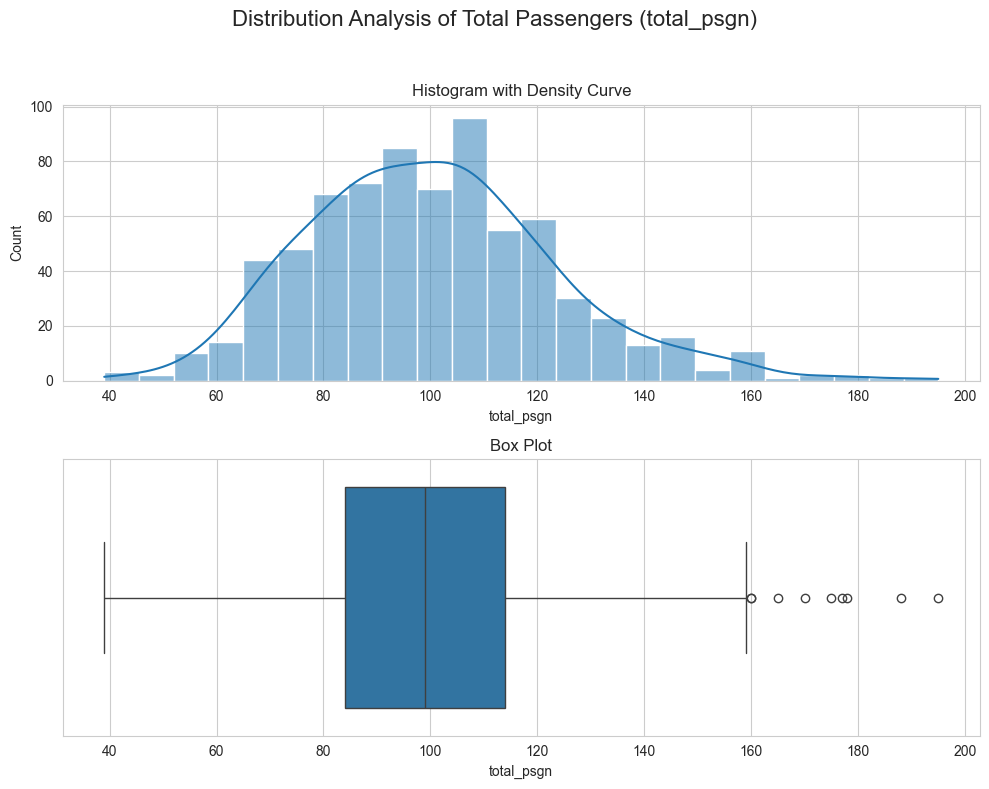

In [149]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle(f'Distribution Analysis of Total Passengers (total_psgn)', fontsize=16)


# 1. --- Create the Distribution Plot (Histogram + KDE) ---
sns.histplot(
    ax=axes[0],
    data=daily_journey_df,
    x='total_psgn',
    kde=True  # This adds the density line, creating the distplot effect
)
axes[0].set_title('Histogram with Density Curve')


# 2. --- Create the Box Plot ---
sns.boxplot(
    ax=axes[1],
    data=daily_journey_df,
    x='total_psgn'
)
axes[1].set_title('Box Plot')


# --- Display the plots ---
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for the suptitle
plt.show()


In [150]:
daily_journey_df_high= daily_journey_df[daily_journey_df["total_psgn"]>1300].copy()
print(daily_journey_df_high.shape)
with pd.option_context('display.max_rows', None):
    print(daily_journey_df_high)


(0, 4)
Empty DataFrame
Columns: [journey_date, total_psgn, day_of_week, month]
Index: []


In [151]:
dff=daily_journey_df_high.groupby('day_of_week')['month'].count().reset_index()
dff

,day_of_week,month


In [152]:
daily_journey_df_low= daily_journey_df[daily_journey_df["total_psgn"]<1000].copy()
print(daily_journey_df_low.shape)
with pd.option_context('display.max_rows', None):
    print(daily_journey_df_low)


(730, 4)
    journey_date  total_psgn day_of_week      month
0     2023-08-01          93     Tuesday     August
1     2023-08-02          90   Wednesday     August
2     2023-08-03          83    Thursday     August
3     2023-08-04          96      Friday     August
4     2023-08-05          99    Saturday     August
5     2023-08-06         116      Sunday     August
6     2023-08-07         107      Monday     August
7     2023-08-08          99     Tuesday     August
8     2023-08-09         131   Wednesday     August
9     2023-08-10          70    Thursday     August
10    2023-08-11         118      Friday     August
11    2023-08-12         107    Saturday     August
12    2023-08-13         128      Sunday     August
13    2023-08-14         119      Monday     August
14    2023-08-15         156     Tuesday     August
15    2023-08-16          85   Wednesday     August
16    2023-08-17          62    Thursday     August
17    2023-08-18         122      Friday     August
18 

In [153]:
dff_low=daily_journey_df_low.groupby('day_of_week')['month'].count().reset_index()
dff_low

,day_of_week,month
0,Friday,104
1,Monday,104
2,Saturday,104
3,Sunday,104
4,Thursday,104
5,Tuesday,105
6,Wednesday,105


Original DataFrame shape: (730, 4)
First half shape (first 364 rows): (364, 4)
Second half shape (the rest): (366, 4)


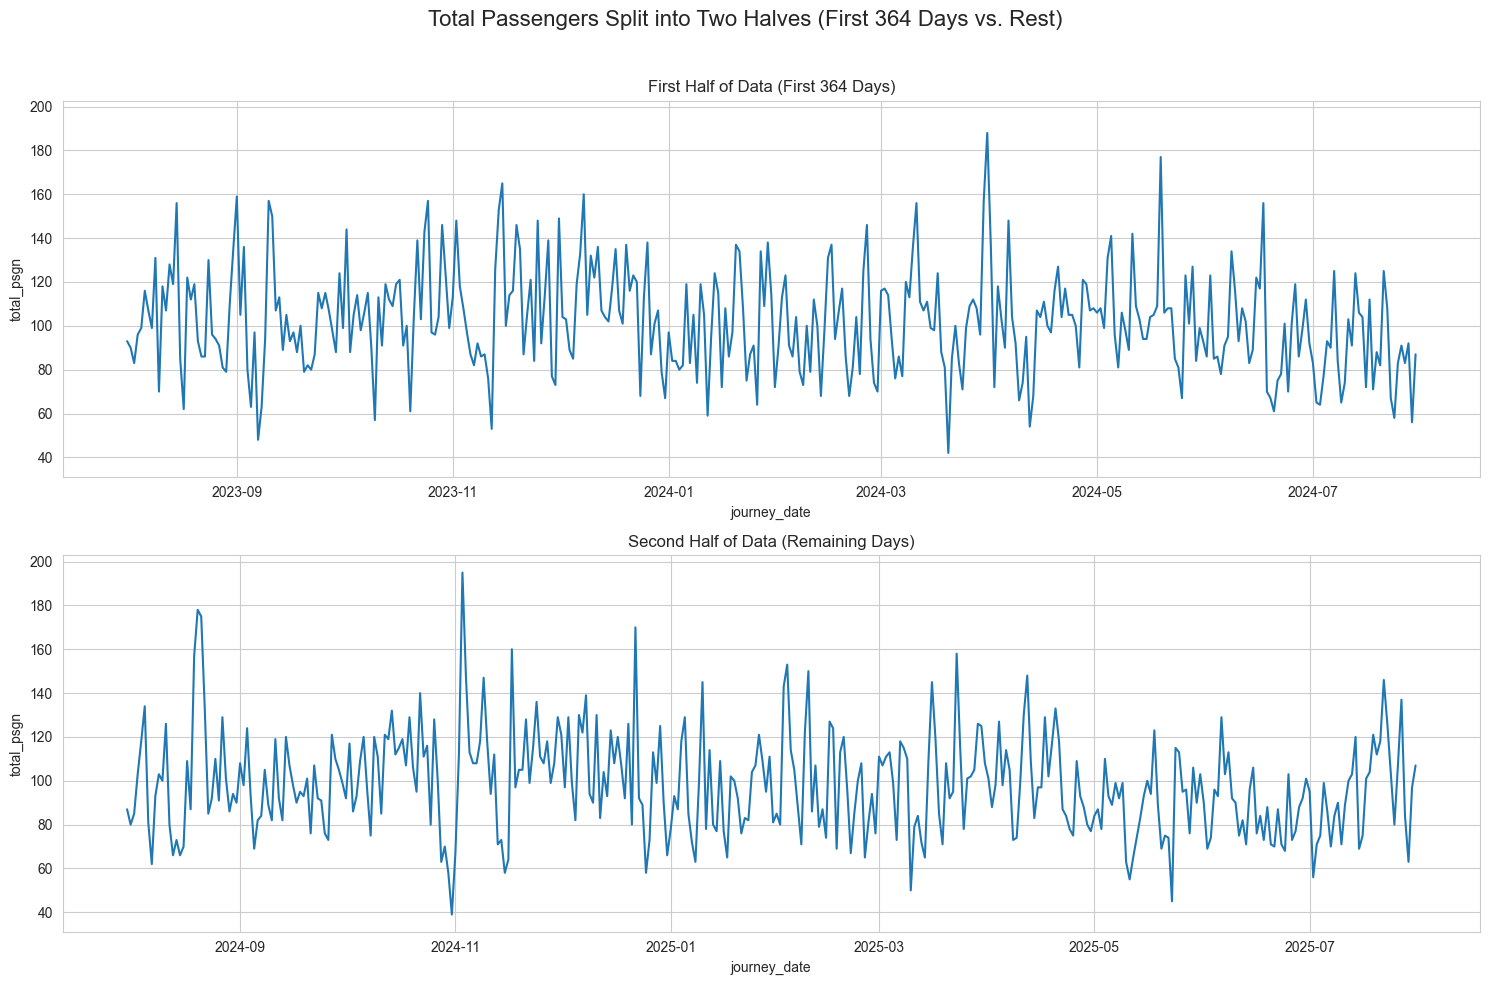


--- Correlation Analysis ---
The correlation between the passenger counts of the two halves is: 0.0255


In [154]:



daily_journey_df = daily_journey_df.sort_values('journey_date').reset_index(drop=True)


# --- 1. Split the DataFrame into the first 364 rows and the rest ---
split_point = 364
daily_journey_df1 = daily_journey_df.iloc[:split_point].copy()
daily_journey_df2 = daily_journey_df.iloc[split_point:].copy()

print(f"Original DataFrame shape: {daily_journey_df.shape}")
print(f"First half shape (first 364 rows): {daily_journey_df1.shape}")
print(f"Second half shape (the rest): {daily_journey_df2.shape}")


# --- 2. Visualize the Two Halves ---
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=False, sharey=True)
fig.suptitle('Total Passengers Split into Two Halves (First 364 Days vs. Rest)', fontsize=16)

# Plot for the first half
sns.lineplot(ax=axes[0], x='journey_date', y='total_psgn', data=daily_journey_df1)
axes[0].set_title('First Half of Data (First 364 Days)')

# Plot for the second half
sns.lineplot(ax=axes[1], x='journey_date', y='total_psgn', data=daily_journey_df2)
axes[1].set_title('Second Half of Data (Remaining Days)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- 3. Calculate the Correlation ---
# Align the two series from their start and compare up to the length of the shorter one
df1_vals = daily_journey_df1['total_psgn'].reset_index(drop=True)
df2_vals = daily_journey_df2['total_psgn'].reset_index(drop=True)
min_len = min(len(df1_vals), len(df2_vals))

# Calculate the Pearson correlation coefficient
correlation = df1_vals.iloc[:min_len].corr(df2_vals.iloc[:min_len])

print("\n--- Correlation Analysis ---")
print(f"The correlation between the passenger counts of the two halves is: {correlation:.4f}")

In [155]:
# histograms of df1 , df2, df3, df4 groupby('day_of_week')['month'].count().reset_index()
df1= daily_journey_df1.groupby('day_of_week')['total_psgn'].mean().reset_index()
df2= daily_journey_df2.groupby('day_of_week')['total_psgn'].mean().reset_index()
print(df1)
print(df2)

  day_of_week  total_psgn
0      Friday   99.230769
1      Monday  106.711538
2    Saturday  107.019231
3      Sunday  114.576923
4    Thursday   94.411765
5     Tuesday   95.622642
6   Wednesday   97.519231
  day_of_week  total_psgn
0      Friday   92.615385
1      Monday   97.615385
2    Saturday  104.153846
3      Sunday  117.442308
4    Thursday   90.339623
5     Tuesday   93.750000
6   Wednesday   92.943396


In [156]:
df_nzm_csmt= df[(df['brdpt_code']=="NZM") &( df['resupto_code']=="CSMT")].copy()
df_nzm_csmt_3A= df_nzm_csmt[(df_nzm_csmt['cls']=="3A")].copy()
df_nzm_csmt_2A= df_nzm_csmt[(df_nzm_csmt['cls']=="2A")].copy()
df_nzm_csmt_1A= df_nzm_csmt[(df_nzm_csmt['cls']=="1A")].copy()

In [157]:
df_nzm_csmt_3A_book= (df_nzm_csmt_3A.groupby('journey_date')['PSGN'].sum().reset_index())

df_nzm_csmt_3A_book.to_pickle("dailyDataT22222NzmCsmt.pkl")
df_nzm_csmt_3A_book


,journey_date,PSGN


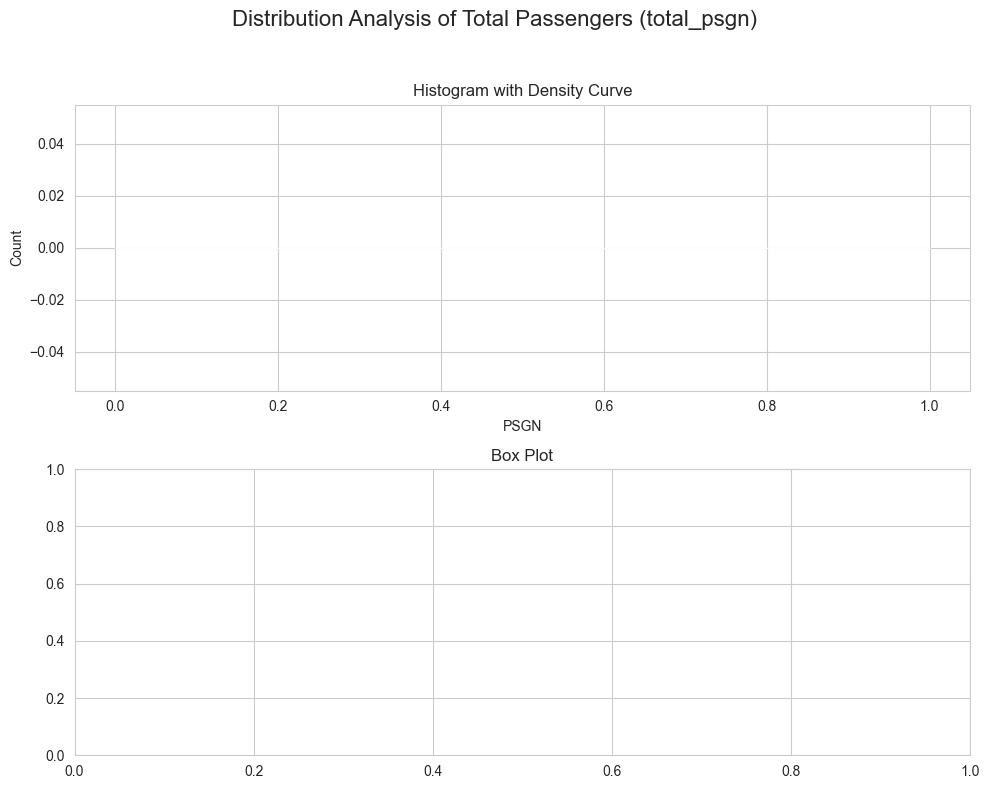

In [158]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Distribution Analysis of Total Passengers (total_psgn)', fontsize=16)


# 1. --- Create the Distribution Plot (Histogram + KDE) ---
sns.histplot(
    ax=axes[0],
    data=df_nzm_csmt_3A_book,
    x='PSGN',
    kde=True  # This adds the density line, creating the distplot effect
)
axes[0].set_title('Histogram with Density Curve')


# 2. --- Create the Box Plot ---
sns.boxplot(
    ax=axes[1],
    data=df_nzm_csmt_3A_book,
    x='PSGN'
)
axes[1].set_title('Box Plot')


# --- Display the plots ---
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout for the suptitle
plt.show()


First half shape (first 364 rows): (0, 2)
Second half shape (the rest): (0, 2)


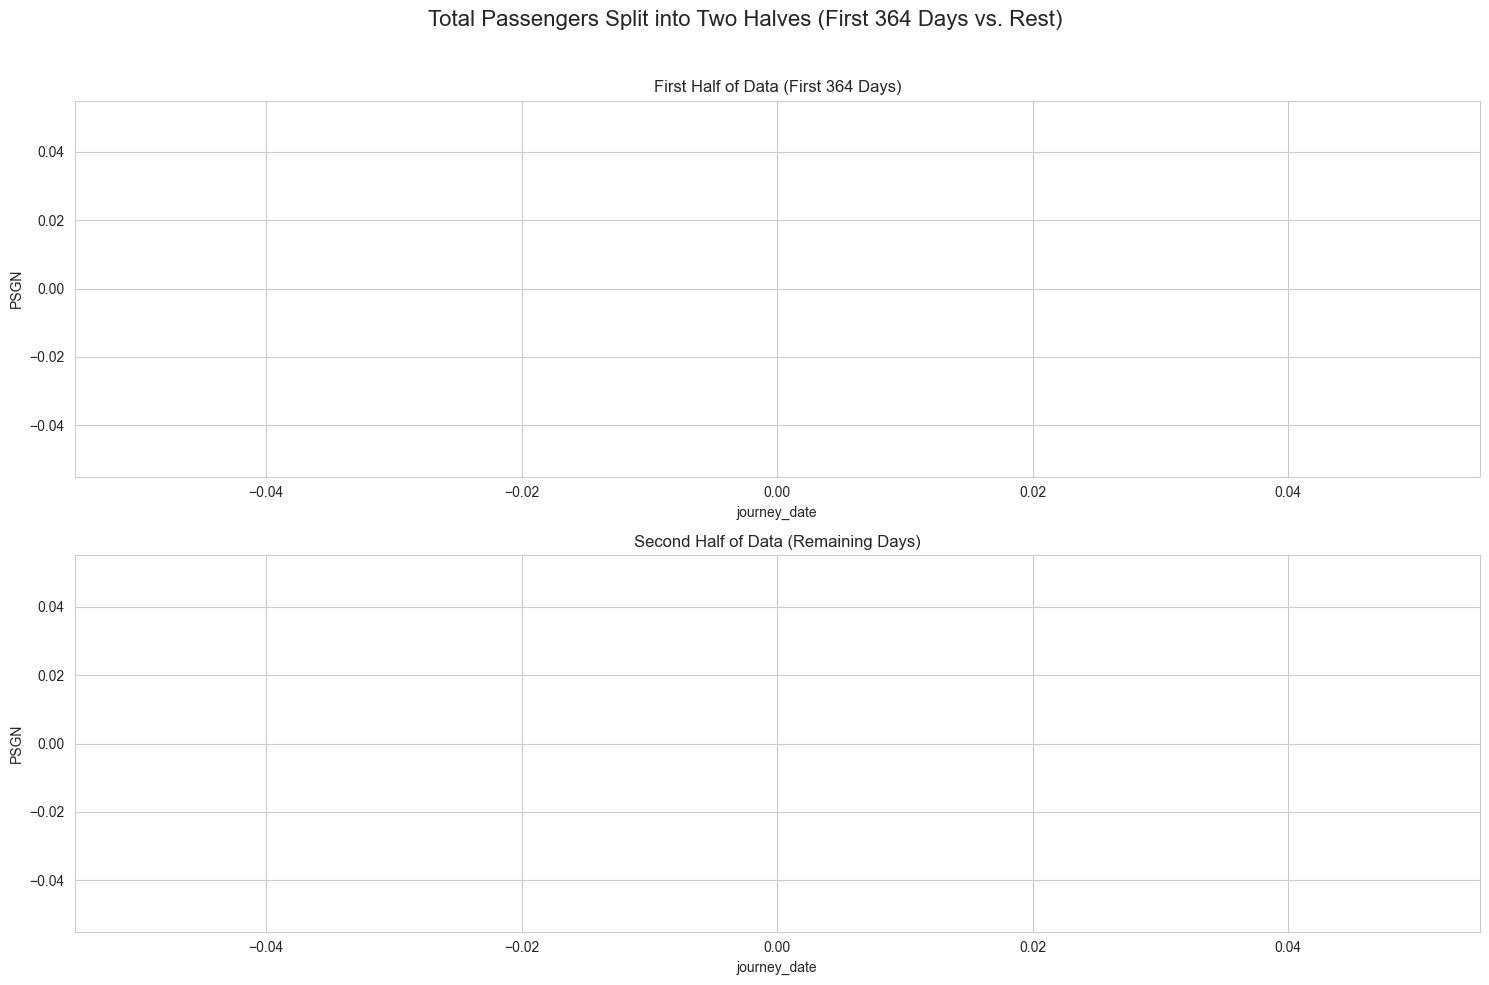


--- Correlation Analysis ---
The correlation between the passenger counts of the two halves is: nan


In [159]:
df_nzm_csmt_3A = df_nzm_csmt_3A_book.sort_values('journey_date').reset_index(drop=True)


# --- 1. Split the DataFrame into the first 364 rows and the rest ---
split_point = 364
daily_journey_df1 = df_nzm_csmt_3A_book.iloc[:split_point].copy()
daily_journey_df2 = df_nzm_csmt_3A_book.iloc[split_point:].copy()

# print(f"Original DataFrame shape: {daily_journey_df.shape}")
print(f"First half shape (first 364 rows): {daily_journey_df1.shape}")
print(f"Second half shape (the rest): {daily_journey_df2.shape}")


# --- 2. Visualize the Two Halves ---
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=False, sharey=True)
fig.suptitle('Total Passengers Split into Two Halves (First 364 Days vs. Rest)', fontsize=16)

# Plot for the first half
sns.lineplot(ax=axes[0], x='journey_date', y='PSGN', data=daily_journey_df1)
axes[0].set_title('First Half of Data (First 364 Days)')

# Plot for the second half
sns.lineplot(ax=axes[1], x='journey_date', y='PSGN', data=daily_journey_df2)
axes[1].set_title('Second Half of Data (Remaining Days)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- 3. Calculate the Correlation ---
# Align the two series from their start and compare up to the length of the shorter one
df1_vals = daily_journey_df1['PSGN'].reset_index(drop=True)
df2_vals = daily_journey_df2['PSGN'].reset_index(drop=True)
min_len = min(len(df1_vals), len(df2_vals))

# Calculate the Pearson correlation coefficient
correlation = df1_vals.iloc[:min_len].corr(df2_vals.iloc[:min_len])

print("\n--- Correlation Analysis ---")
print(f"The correlation between the passenger counts of the two halves is: {correlation:.4f}")

In [160]:
daily_journey_df.to_pickle("dailyDataT22222.pkl")
